# **Problema**
El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

**Fecha-I :** Fecha y hora programada del vuelo.

**Vlo-I :** Número de vuelo programado.

**Ori-I :** Código de ciudad de origen programado.

**Des-I :** Código de ciudad de destino programado.

**Emp-I :** Código aerolínea de vuelo programado.

**Fecha-O :** Fecha y hora de operación del vuelo.

**Vlo-O :** Número de vuelo de operación del vuelo.

**Ori-O :** Código de ciudad de origen de operación.

**Des-O :** Código de ciudad de destino de operación.

**Emp-O :** Código aerolínea de vuelo operado.

**DIA :** Día del mes de operación del vuelo.

**MES :** Número de mes de operación del vuelo.

**AÑO :** Año de operación del vuelo.

**DIANOM :** Día de la semana de operación del vuelo.

**TIPOVUELO :** Tipo de vuelo, I =Internacional, N =Nacional.

**OPERA :**  Nombre de aerolínea que opera.

**SIGLAORI :** Nombre ciudad origen.

**SIGLADES :** Nombre ciudad destino.

# Limpieza Exploratoria de Datos

In [ ]:
import numpy as np
import pandas as pd
ruta = "/content/dataset_SCL (1).csv" # pegar aqui la ruta al dataset
df = pd.read_csv(ruta, dtype={1: "string", 6: "string"})#DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [ ]:
df.info()
df[df['Vlo-O'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  string        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  string        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,<NA>,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [ ]:
df["Vlo-O"][6068] = "200"
df[df['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [ ]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


# Analisisde Datos


In [ ]:
import numpy as np
import pandas as pd
ruta = "/content/dataset_SCL.csv" # pegar aqui la ruta al dataset
df = pd.read_csv(ruta, dtype={1: "string", 6: "string"})#DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df["Vlo-O"][6068] = "200"

# Eliminar filas duplicadas
df = df.drop_duplicates()
df.columns = df.columns.str.replace('-', '_',regex=True).str.replace(' ', '_',regex=True).str.upper()
print("Antes:")
print(df.columns,"\n")
# Reemplazar caracteres especiales en los nombres de las columnas
df.columns = df.columns.str.replace('-', '_',regex=True).str.replace(' ', '_',regex=True).str.upper()
print("Despues:")
print(df.columns,"\n")
#de cadenas de texto y transformación a datos numéricos

# Convertir columnas a tipos de datos correctos
df.info()

Antes:
Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object') 

Despues:
Index(['FECHA_I', 'VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'FECHA_O', 'VLO_O',
       'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FECHA_I    68206 non-null  datetime64[ns]
 1   VLO_I      68206 non-null  string        
 2   ORI_I      68206 non-null  object        
 3   DES_I      68206 non-null  object        
 4   EMP_I      68206 non-null  object        
 5   FECHA_O    68206 non-null  datetime64[ns]
 6   VLO_O      68206 non-null  string        
 7   ORI_O      68

['DES_I', 'EMP_I', 'DES_O', 'EMP_O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES']


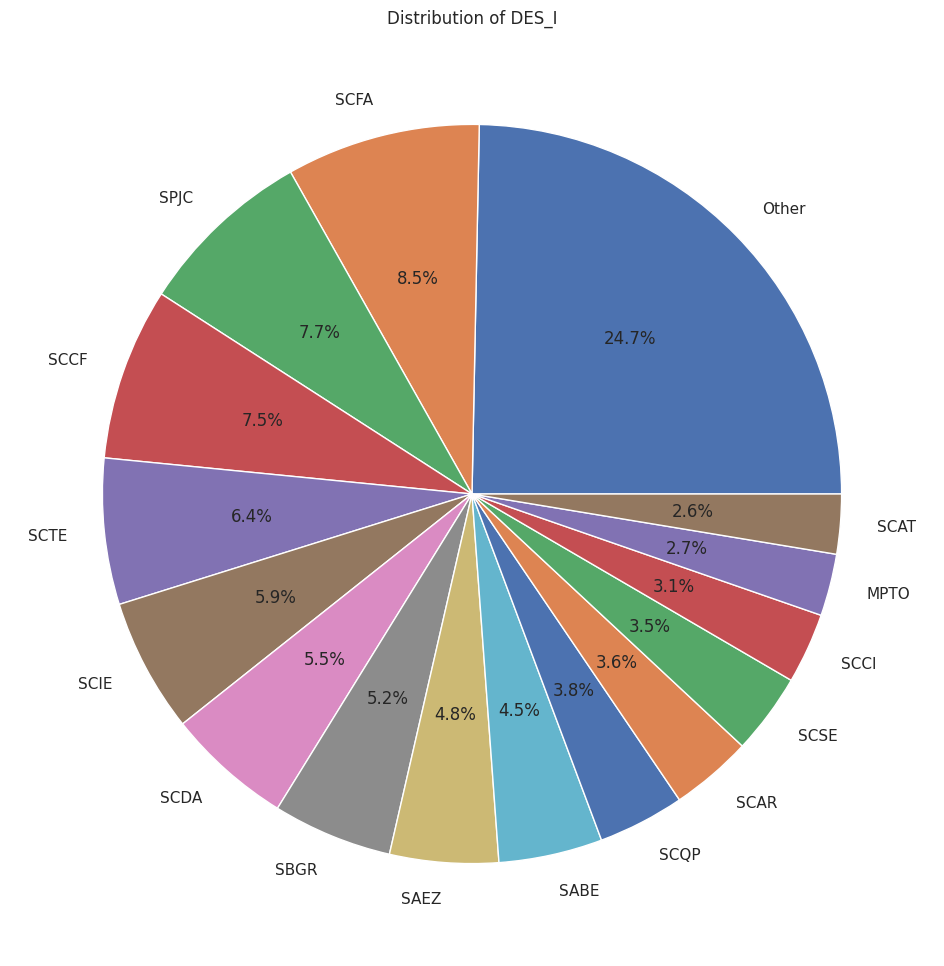

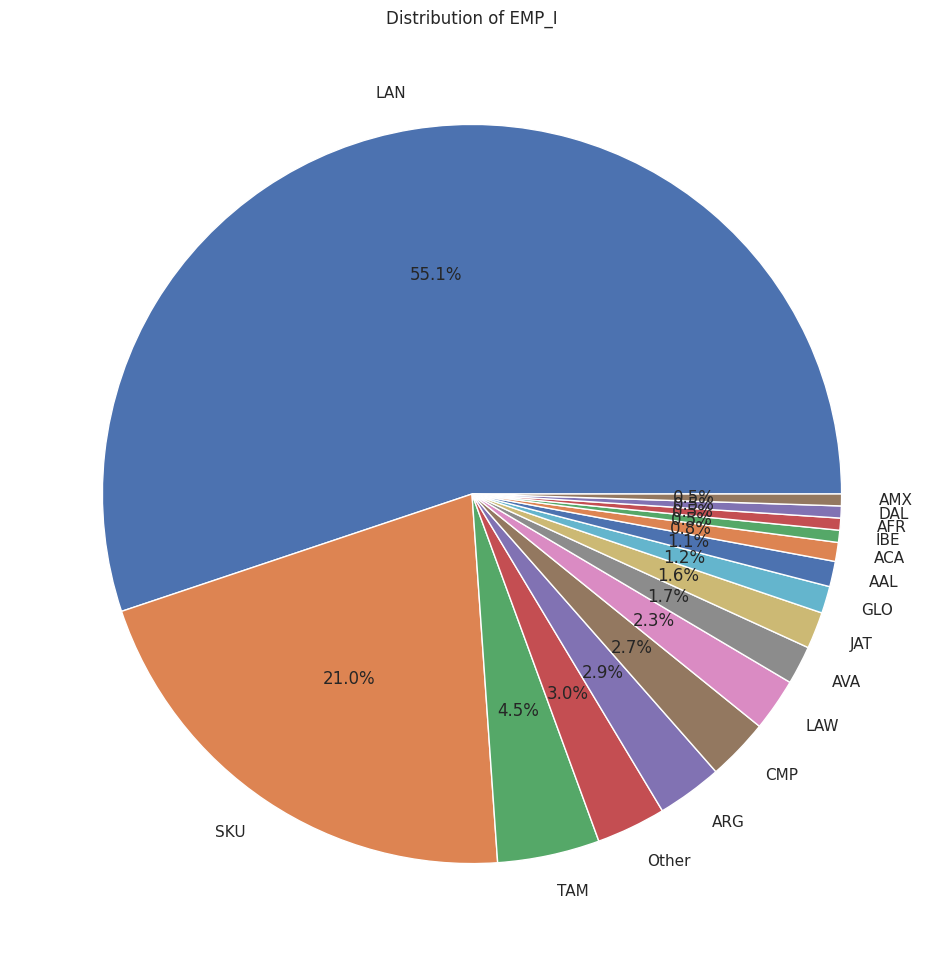

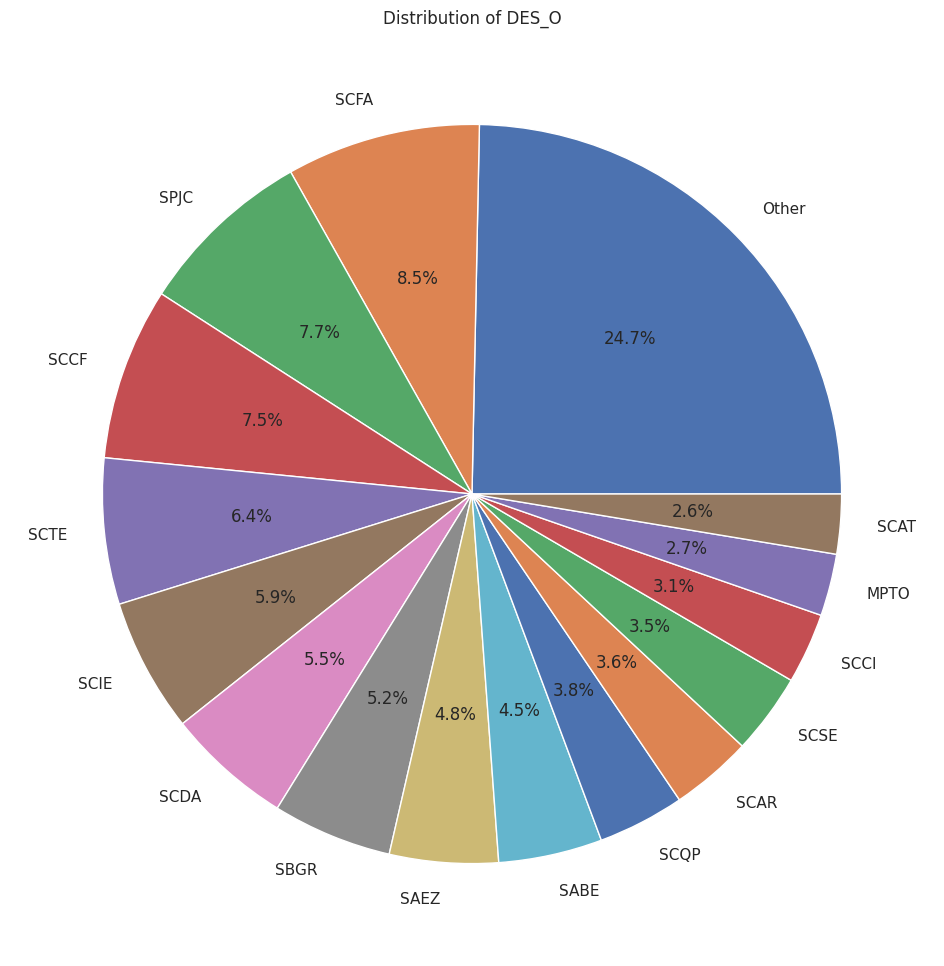

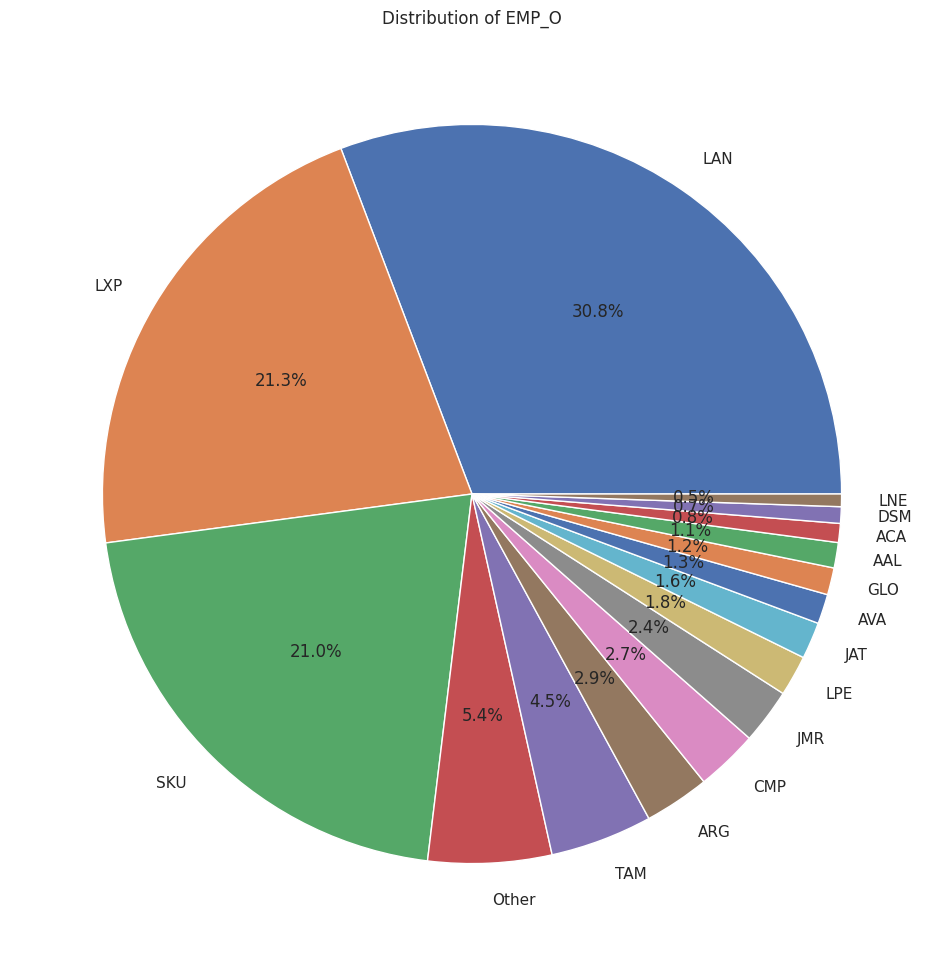

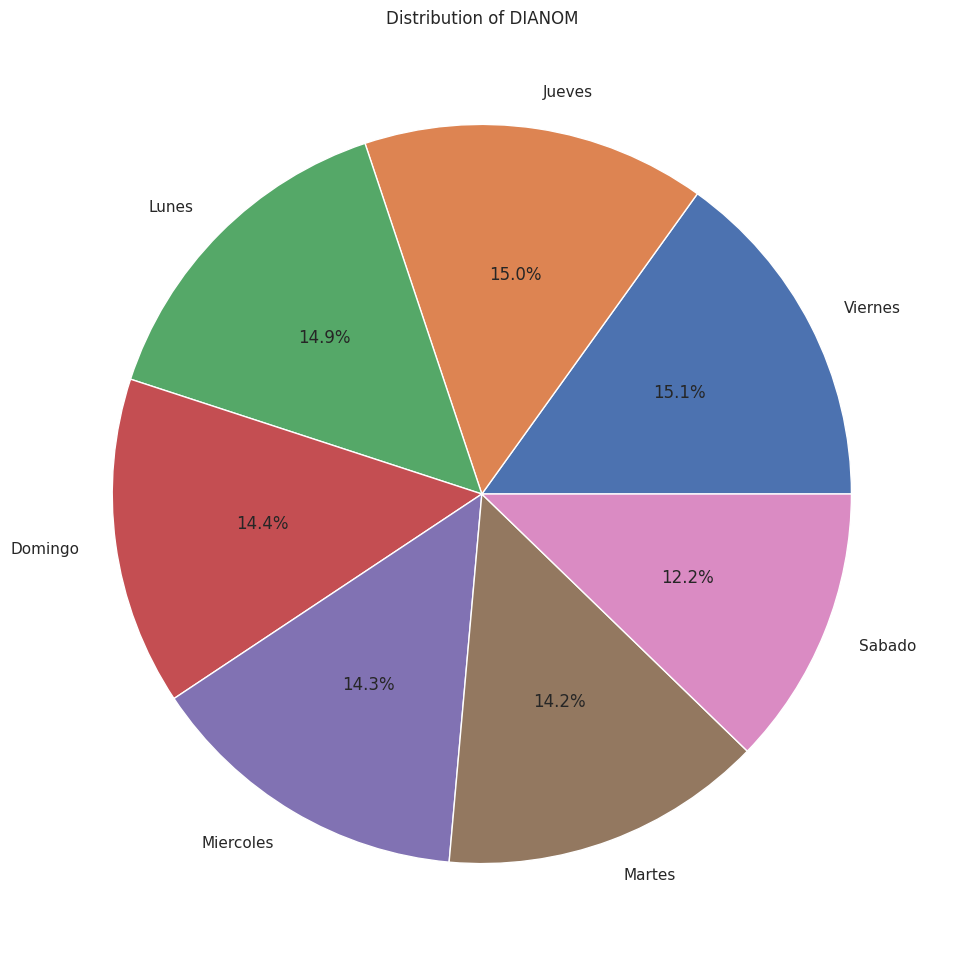

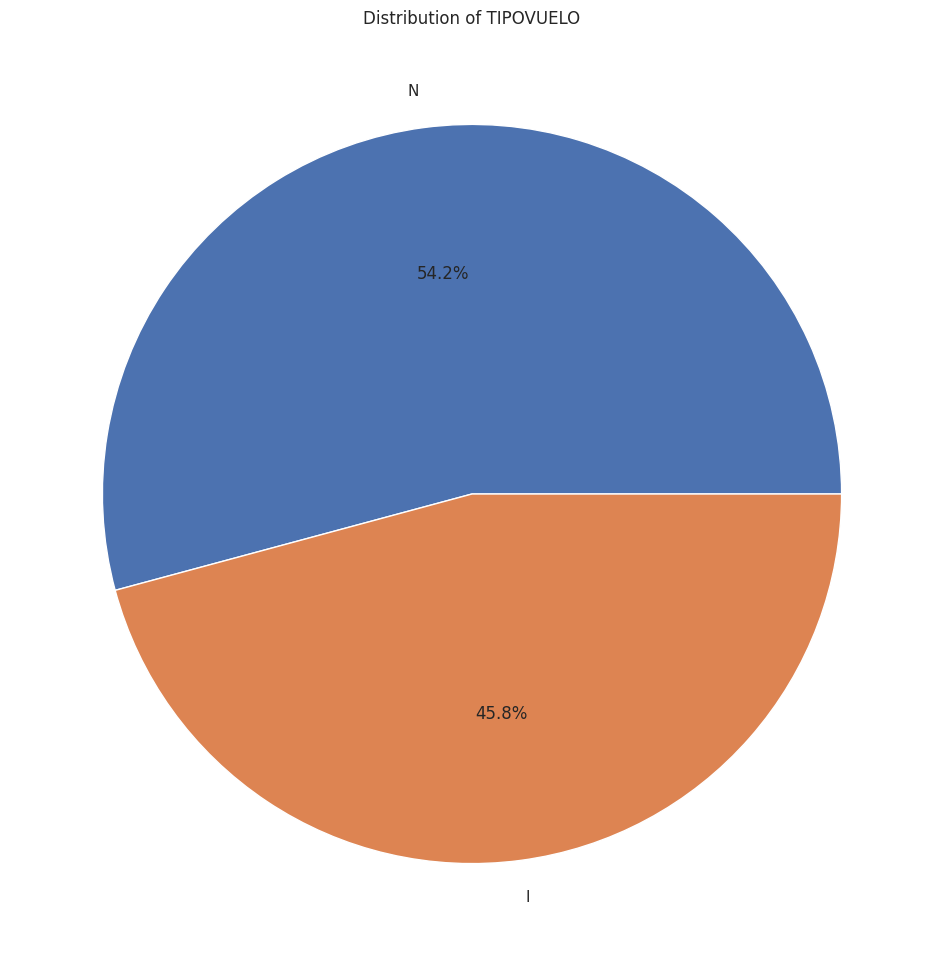

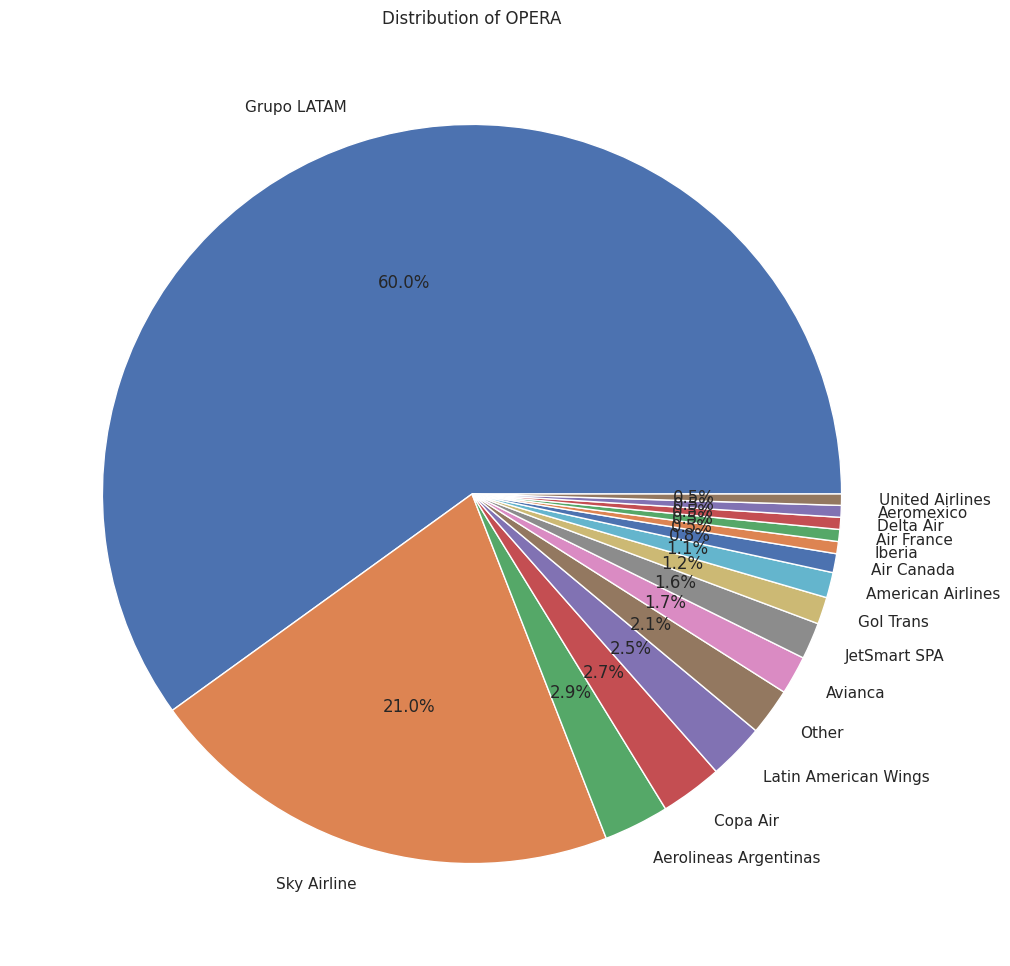

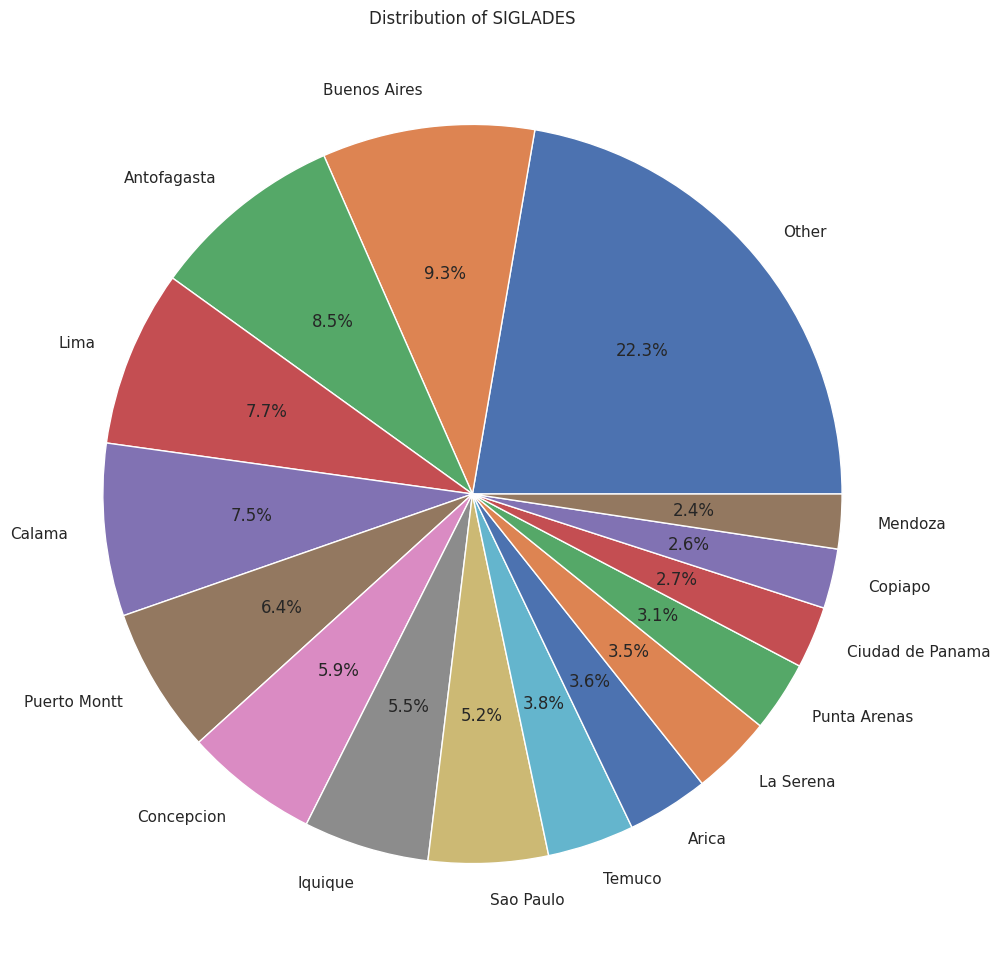

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")  # Establecer el estilo de Seaborn
from matplotlib import pyplot as plt
"""
# Generar gráficos de caja para las columnas numéricas
numeric_cols =["DIA","MES","AÑO"]
for col in numeric_cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()
                                     # Violin
    plt.figure(figsize=(12,6))
    sns.violinplot(x=df[col])
    plt.title(f"Violin plot of {col}")
    plt.show()
                                      # histograma
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=col, kde=True)  # kde=True traza una estimación de la densidad de probabilidad
    plt.title(f"Histogram of {col}")
    plt.show()
"""
# Distribución de las columnas categóricas (considerando solo las primeras 20 categorías más comunes)
categorical_cols = [x for x in df.columns if x not in ["ORI_O","SIGLAORI","ORI_I","VLO_I","VLO_O","DIA", "MES", "AÑO", "FECHA_I", "FECHA_O"]]
print(categorical_cols)

for col in categorical_cols:

    # Excluir 'Inmature'
    # df_filtered = df[df[col] != 'Inmature']

    # Obtén las 20 categorías más comunes
    top20_categories = df[col].value_counts().index[:15]

    # Filtra el dataframe solo con estas categorías
    df_top20 = df[df[col].isin(top20_categories)]



    plt.figure(figsize=(12, 12))
    # Obtén las 10 categorías más comunes
    top10_categories = df[col].value_counts().index[:15]

    # Crea un nuevo DataFrame donde las categorías que no están en las top 10 se marcan como 'Others'
    df_top10_others = df.copy()
    df_top10_others.loc[~df_top10_others[col].isin(top10_categories), col] = 'Other'

    df_top10_others[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Distribution of {col}")
    plt.ylabel('')  # Elimina la etiqueta del eje y ya que no es necesaria para los gráficos de pastel
    plt.show()





In [ ]:
import pandas as pd

# Generar columnas adicionales
df["temporada_alta"] = ((df["FECHA_I"].dt.month == 12) & (df["FECHA_I"].dt.day >= 15)) | \
                       ((df["FECHA_I"].dt.month == 3) & (df["FECHA_I"].dt.day <= 3)) | \
                       ((df["FECHA_I"].dt.month == 7) & (df["FECHA_I"].dt.day >= 15) & (df["FECHA_I"].dt.day <= 31)) | \
                       ((df["FECHA_I"].dt.month == 9) & (df["FECHA_I"].dt.day >= 11) & (df["FECHA_I"].dt.day <= 30))

df["dif_min"] = (df["FECHA_O"] - df["FECHA_I"]).dt.total_seconds() // 60

df["atraso_15"] = df["dif_min"].apply(lambda x: 1 if x > 15 else 0)

df["periodo_dia"] = pd.cut(df["FECHA_I"].dt.hour,
                           bins=[0, 5, 12, 19, 24],
                           labels=["noche", "mañana", "tarde", "noche"],
                           right=False,
                           ordered=False)

# Exportar a un archivo CSV
df.to_csv("synthetic_features.csv", index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_I         68206 non-null  datetime64[ns]
 1   VLO_I           68206 non-null  string        
 2   ORI_I           68206 non-null  object        
 3   DES_I           68206 non-null  object        
 4   EMP_I           68206 non-null  object        
 5   FECHA_O         68206 non-null  datetime64[ns]
 6   VLO_O           68206 non-null  string        
 7   ORI_O           68206 non-null  object        
 8   DES_O           68206 non-null  object        
 9   EMP_O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [ ]:
df

,FECHA_I,VLO_I,ORI_I,DES_I,EMP_I,FECHA_O,VLO_O,ORI_O,DES_O,EMP_O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,False,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,False,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,False,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,False,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,False,-2.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,True,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,True,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,True,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,True,13.0,0,tarde


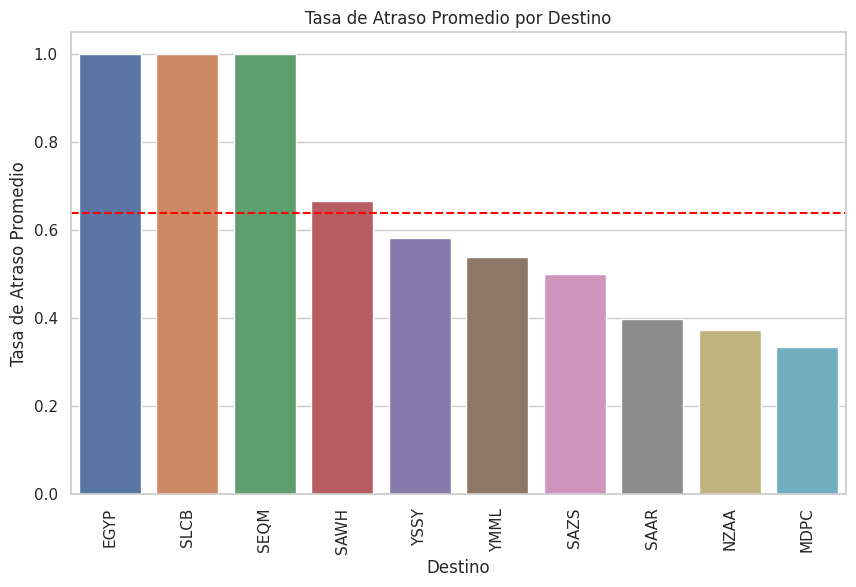

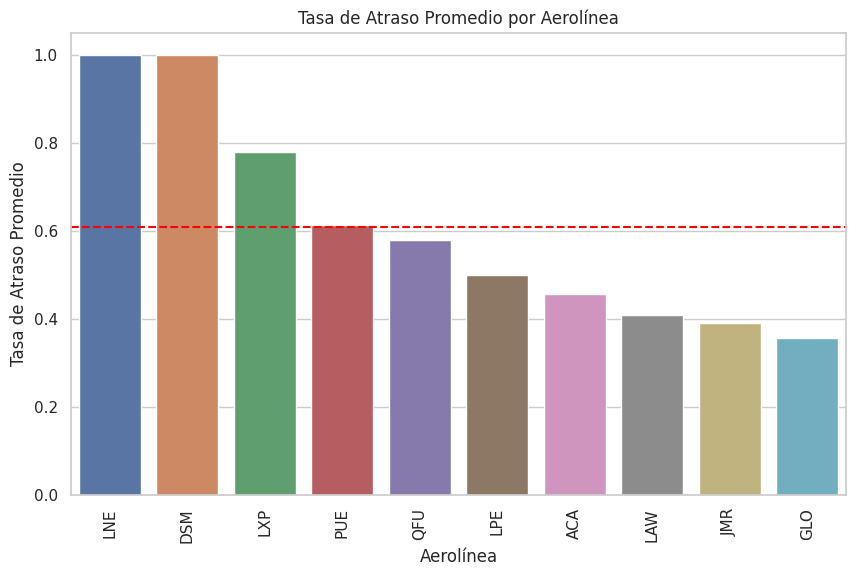

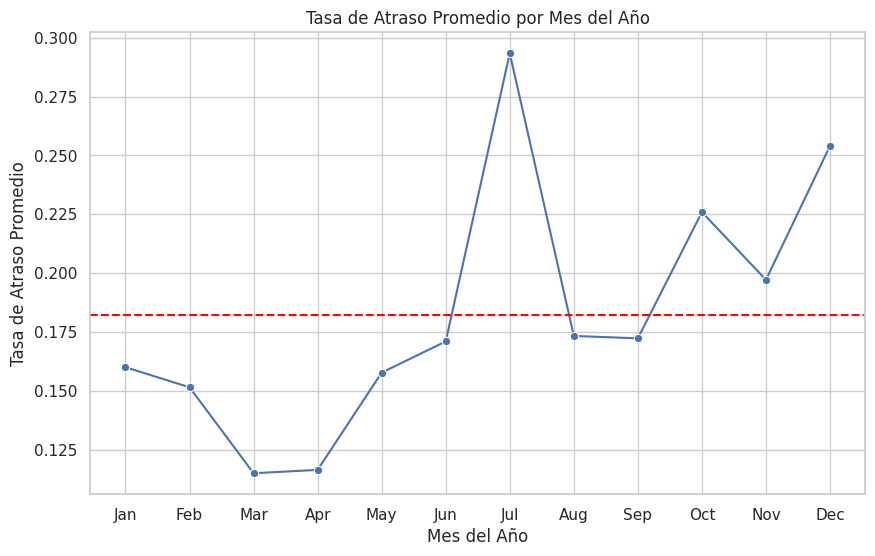

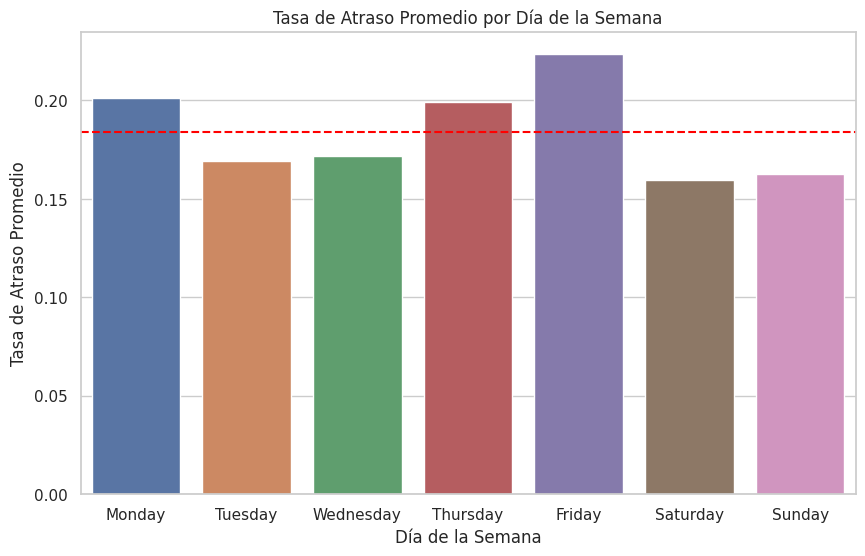

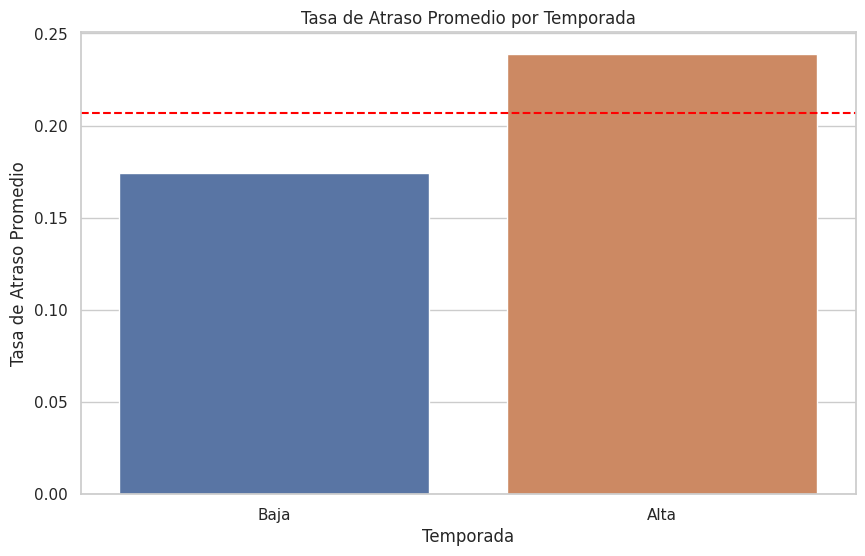

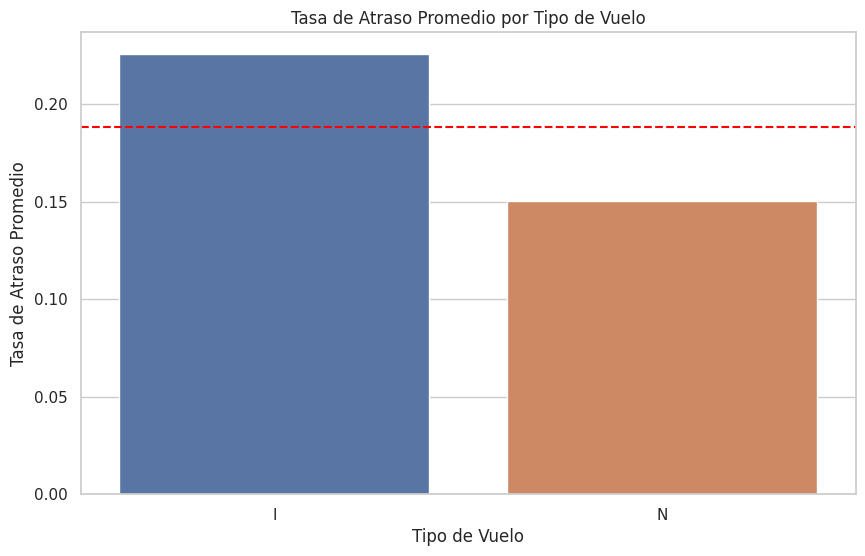

In [ ]:
import calendar

# Calcular tasa de atraso promedio por destino
destino_atraso = df.groupby("DES_O")["atraso_15"].mean().reset_index()
destino_atraso = destino_atraso.sort_values(by="atraso_15", ascending=False).head(10)

# Graficar la tasa de atraso promedio por destino
plt.figure(figsize=(10, 6))
sns.barplot(data=destino_atraso, x="DES_O", y="atraso_15", order=destino_atraso["DES_O"])
plt.xticks(rotation=90)
plt.xlabel("Destino")
plt.ylabel("Tasa de Atraso Promedio")
plt.title("Tasa de Atraso Promedio por Destino")
plt.axhline(y=destino_atraso["atraso_15"].mean(), color="red", linestyle="--")
plt.show()

# Calcular tasa de atraso promedio por aerolínea
aerolinea_atraso = df.groupby("EMP_I")["atraso_15"].mean().reset_index()
aerolinea_atraso = aerolinea_atraso.sort_values(by="atraso_15", ascending=False).head(10)

# Graficar la tasa de atraso promedio por aerolínea
plt.figure(figsize=(10, 6))
sns.barplot(data=aerolinea_atraso, x="EMP_I", y="atraso_15", order=aerolinea_atraso["EMP_I"])
plt.xticks(rotation=90)
plt.xlabel("Aerolínea")
plt.ylabel("Tasa de Atraso Promedio")
plt.title("Tasa de Atraso Promedio por Aerolínea")
plt.axhline(y=aerolinea_atraso["atraso_15"].mean(), color="red", linestyle="--")
plt.show()

# Calcular tasa de atraso promedio por mes del año
mes_atraso = df.groupby("MES")["atraso_15"].mean().reset_index()
mes_atraso["MES"] = mes_atraso["MES"].apply(lambda x: calendar.month_abbr[x])

# Graficar la tasa de atraso promedio por mes del año
plt.figure(figsize=(10, 6))
sns.lineplot(data=mes_atraso, x="MES", y="atraso_15", marker="o")
plt.xlabel("Mes del Año")
plt.ylabel("Tasa de Atraso Promedio")
plt.title("Tasa de Atraso Promedio por Mes del Año")
plt.axhline(y=mes_atraso["atraso_15"].mean(), color="red", linestyle="--")
plt.show()

# Calcular tasa de atraso promedio por día de la semana
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
dia_semana_atraso = df.groupby("DIA_SEMANA")["atraso_15"].mean().reset_index()
dia_semana_atraso = dia_semana_atraso.sort_values(by="atraso_15", ascending=False)

# Graficar la tasa de atraso promedio por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(data=dia_semana_atraso, x="DIA_SEMANA", y="atraso_15", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Día de la Semana")
plt.ylabel("Tasa de Atraso Promedio")
plt.title("Tasa de Atraso Promedio por Día de la Semana")
plt.axhline(y=dia_semana_atraso["atraso_15"].mean(), color="red", linestyle="--")
plt.show()

# Calcular tasa de atraso promedio por temporada
temporada_atraso = df.groupby("temporada_alta")["atraso_15"].mean().reset_index()
temporada_atraso["temporada_alta"] = temporada_atraso["temporada_alta"].apply(lambda x: "Alta" if x else "Baja")

# Graficar la tasa de atraso promedio por temporada
plt.figure(figsize=(10, 6))
sns.barplot(data=temporada_atraso, x="temporada_alta", y="atraso_15", order=["Baja", "Alta"])
plt.xlabel("Temporada")
plt.ylabel("Tasa de Atraso Promedio")
plt.title("Tasa de Atraso Promedio por Temporada")
plt.axhline(y=temporada_atraso["atraso_15"].mean(), color="red", linestyle="--")
plt.show()

# Calcular tasa de atraso promedio por tipo de vuelo
tipo_vuelo_atraso = df.groupby("TIPOVUELO")["atraso_15"].mean().reset_index()
tipo_vuelo_atraso = tipo_vuelo_atraso.sort_values(by="atraso_15", ascending=False)

# Graficar la tasa de atraso promedio por tipo de vuelo
plt.figure(figsize=(10, 6))
sns.barplot(data=tipo_vuelo_atraso, x="TIPOVUELO", y="atraso_15", order=tipo_vuelo_atraso["TIPOVUELO"])
plt.xlabel("Tipo de Vuelo")
plt.ylabel("Tasa de Atraso Promedio")
plt.title("Tasa de Atraso Promedio por Tipo de Vuelo")
plt.axhline(y=tipo_vuelo_atraso["atraso_15"].mean(), color="red", linestyle="--")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 68205
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_I         68206 non-null  datetime64[ns]
 1   VLO_I           68206 non-null  string        
 2   ORI_I           68206 non-null  object        
 3   DES_I           68206 non-null  object        
 4   EMP_I           68206 non-null  object        
 5   FECHA_O         68206 non-null  datetime64[ns]
 6   VLO_O           68206 non-null  string        
 7   ORI_O           68206 non-null  object        
 8   DES_O           68206 non-null  object        
 9   EMP_O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

ruta = "/content/synthetic_features.csv"  # Ruta al archivo CSV
df = pd.read_csv(ruta,low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)

# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15','dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
#X_train[num_features] = scaler.fit_transform(X_train[num_features])
#X_test[num_features] = scaler.transform(X_test[num_features])

# Verificar los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba (y_test):", y_test.shape)





Dimensiones del conjunto de entrenamiento (X_train): (47744, 19)
Dimensiones del conjunto de prueba (X_test): (20462, 19)
Dimensiones del conjunto de entrenamiento (y_train): (47744,)
Dimensiones del conjunto de prueba (y_test): (20462,)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Leer el dataset original
ruta = "/content/dataset_SCL.csv"
df2 = pd.read_csv(ruta, dtype={1: "string", 6: "string"})

# Crear una columna que indique los continentes del destino
continentes = {
    'KMIA': 'América',
    'KDFW': 'América',
    'SAEZ': 'América',
    'CYYZ': 'América',
    'LFPG': 'Europa',
    'MMMX': 'América',
    'SABE': 'América',
    'SKBO': 'América',
    'LIRF': 'Europa',
    'EGLL': 'Europa',
    'MPTO': 'América',
    'KATL': 'América',
    'SBGR': 'América',
    'SBGL': 'América',
    'SBFL': 'América',
    'LEMD': 'Europa',
    'SPJC': 'América',
    'YSSY': 'Oceanía',
    'KIAH': 'América',
    'SGAS': 'América',
    'SBFI': 'América',
    'SCTE': 'América',
    'SCCI': 'América',
    'SCNT': 'América',
    'SCBA': 'América',
    'SCQP': 'América',
    'SCVD': 'América',
    'SCIE': 'América',
    'SCSE': 'América',
    'SCAT': 'América',
    'SCCF': 'América',
    'SCFA': 'América',
    'SCDA': 'América',
    'SCAR': 'América',
    'SAME': 'América',
    'SACO': 'América',
    'SUMU': 'América',
    'SCPQ': 'América',
    'SCJO': 'América',
    'KMCO': 'América',
    'KJFK': 'América',
    'SEGU': 'América',
    'MMUN': 'América',
    'MDPC': 'América',
    'KLAX': 'América',
    'NZAA': 'Oceanía',
    'SCIP': 'América',
    'SLLP': 'América',
    'SLVR': 'América',
    'SBCT': 'América',
    'SEQM': 'América',
    'SAZS': 'América',
    'SAAR': 'América',
    'KIAD': 'América',
    'SANT': 'América',
    'YMML': 'Oceanía',
    'SANU': 'América',
    'SAZN': 'América',
    'SPSO': 'América',
    'SAWH': 'América',
    'EGYP': 'Europa',
    'SULS': 'América',
    'SLCB': 'América'
}
df2['Continente'] = df2['Des-O'].map(continentes)

# Leer el dataset con las características sintéticas
ruta_sinteticas = "/content/synthetic_features.csv"
df = pd.read_csv(ruta_sinteticas, low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)
df['Continente']=df2['Continente']
# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA', 'Continente']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15','dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
#X_train[num_features] = scaler.fit_transform(X_train[num_features])
#X_test[num_features] = scaler.transform(X_test[num_features])

# Verificar los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba (y_test):", y_test.shape)


Dimensiones del conjunto de entrenamiento (X_train): (47744, 20)
Dimensiones del conjunto de prueba (X_test): (20462, 20)
Dimensiones del conjunto de entrenamiento (y_train): (47744,)
Dimensiones del conjunto de prueba (y_test): (20462,)


array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCQP', 'SCVD', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'KIAD', 'SANT', 'YMML',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB'],
      dtype=object)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Clasificación con Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16636
           1       0.65      0.12      0.20      3826

    accuracy                           0.82     20462
   macro avg       0.74      0.55      0.55     20462
weighted avg       0.79      0.82      0.77     20462

Accuracy - Random Forest: 0.8227445997458704


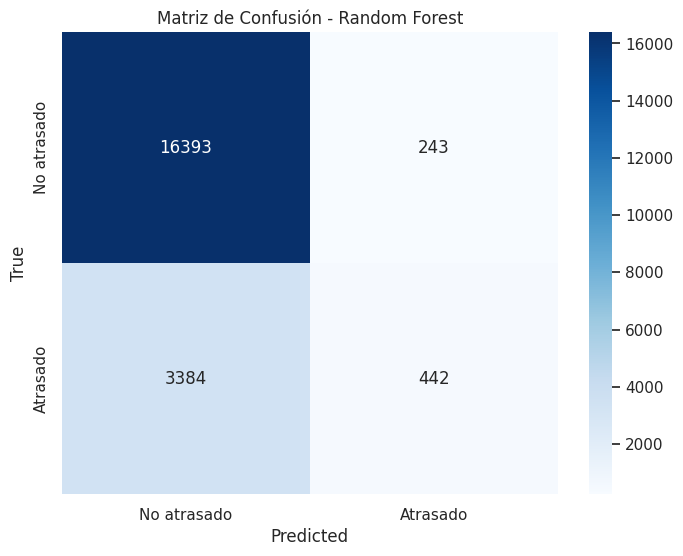

Mejores hiperparámetros - Random Forest:
{'max_depth': 15, 'n_estimators': 200}


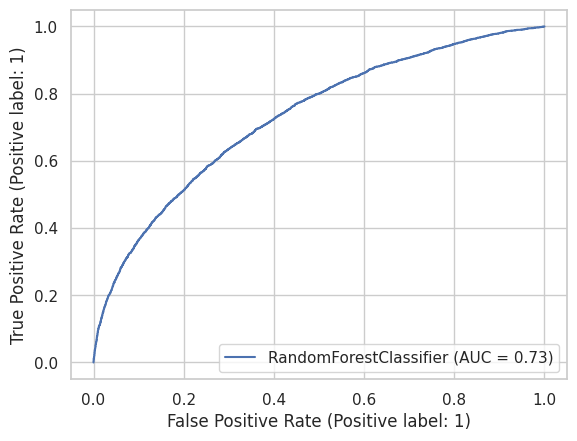

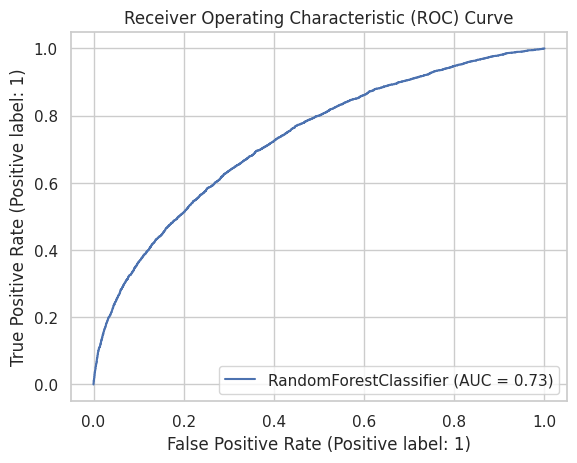

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

ruta = "/content/synthetic_features.csv"  # Ruta al archivo CSV
df = pd.read_csv(ruta,low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)

# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15','dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
#X_train[num_features] = scaler.fit_transform(X_train[num_features])
#X_test[num_features] = scaler.transform(X_test[num_features])

# Establecer hiperparámetros y entrenar Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200, 360],
                 'max_depth': [None, 3, 5, 10, 15]}
rf_clf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3,
                              return_train_score=True, verbose=True)
grid_search_rf.fit(X_train, y_train)
best_rf_clf = grid_search_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_rf = best_rf_clf.predict(X_test)

# Mostrar métricas de clasificación
print("Clasificación con Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy - Random Forest:", accuracy_score(y_test, y_pred_rf))

# Calcular y graficar la matriz de confusión con leyenda
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.yticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.show()

# Mostrar los mejores parámetros
print("Mejores hiperparámetros - Random Forest:")
print(grid_search_rf.best_params_)
# Calculate and display the ROC curve
roc_display = RocCurveDisplay.from_estimator(best_rf_clf, X_test, y_test)
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

ruta = "/content/synthetic_features.csv"  # Ruta al archivo CSV
df = pd.read_csv(ruta)
df.info()

<ipython-input-44-45e74cd183fe>:10: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHA_I         68206 non-null  object 
 1   VLO_I           68206 non-null  object 
 2   ORI_I           68206 non-null  object 
 3   DES_I           68206 non-null  object 
 4   EMP_I           68206 non-null  object 
 5   FECHA_O         68206 non-null  object 
 6   VLO_O           68206 non-null  object 
 7   ORI_O           68206 non-null  object 
 8   DES_O           68206 non-null  object 
 9   EMP_O           68206 non-null  object 
 10  DIA             68206 non-null  int64  
 11  MES             68206 non-null  int64  
 12  AÑO             68206 non-null  int64  
 13  DIANOM          68206 non-null  object 
 14  TIPOVUELO       68206 non-null  object 
 15  OPERA           68206 non-null  object 
 16  SIGLAORI        68206 non-null  object 
 17  SIGLADES        68206 non-null 

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Informe de clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     16636
           1       0.00      0.00      0.00      3826

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

Precisión - Regresión Logística: 0.8129703841266739
Mejores hiperparámetros:  {'C': 0.0001, 'class_weight': {0: 0.8, 1: 0.2}, 'penalty': 'l2', 'solver': 'liblinear'}


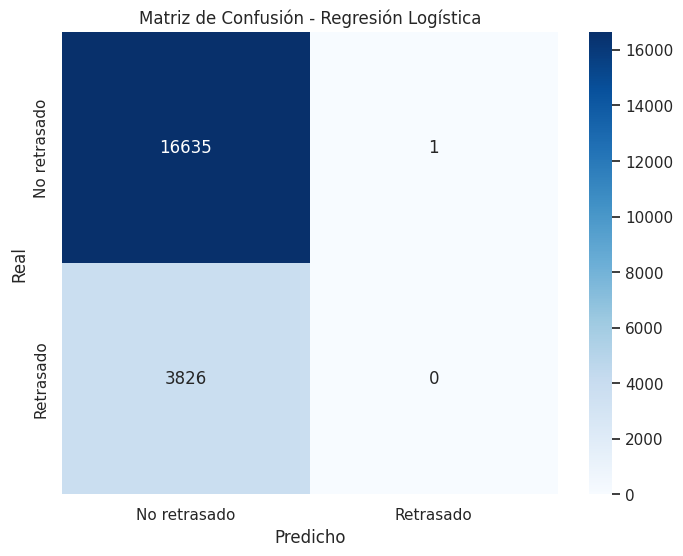

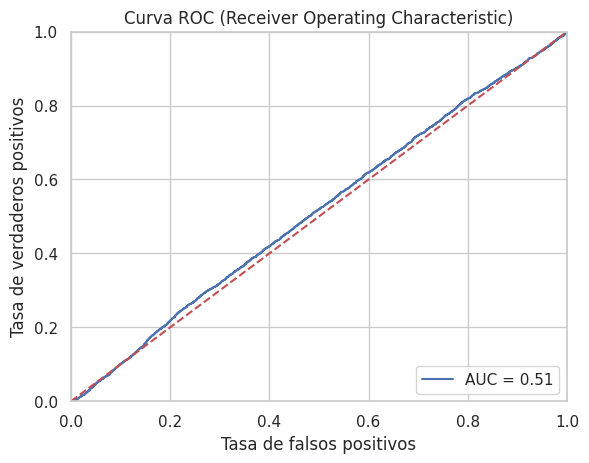

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

ruta = "/content/synthetic_features.csv"  # Ruta al archivo CSV
df = pd.read_csv(ruta,low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)

# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15','dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
#X_train[num_features] = scaler.fit_transform(X_train[num_features])
#X_test[num_features] = scaler.transform(X_test[num_features])

# Definir el grid de hiperparámetros para GridSearchCV de Regresión Logística
param_grid_rl = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                 'class_weight': [{0: 0.8, 1: 0.2}]}

rl_clf = LogisticRegression()
grid_search_rl = GridSearchCV(rl_clf, param_grid_rl, scoring='accuracy',
                              return_train_score=True, verbose=True)
grid_search_rl.fit(X_train, y_train)
best_rl_clf = grid_search_rl.best_estimator_
y_pred_rl = best_rl_clf.predict(X_test)

# Mostrar el informe de clasificación y los resultados de Regresión Logística
print("Informe de clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_rl))
print("Precisión - Regresión Logística:", accuracy_score(y_test, y_pred_rl))
print("Mejores hiperparámetros: ", grid_search_rl.best_params_)

# Mostrar la matriz de confusión con etiquetas
cm_rl = confusion_matrix(y_test, y_pred_rl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rl, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], ['No retrasado', 'Retrasado'])
plt.yticks([0.5, 1.5], ['No retrasado', 'Retrasado'])
plt.show()

# Calcular probabilidades para la curva ROC
y_pred_proba_rl = best_rl_clf.predict_proba(X_test)[:, 1]

# Calcular y mostrar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rl)
roc_auc = roc_auc_score(y_test, y_pred_proba_rl)

plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 21 candidates, totalling 105 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Informe de clasificación - Ridge Classifier:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     16636
           1       0.00      0.00      0.00      3826

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

Matriz de confusión - Ridge Classifier:
[[16636     0]
 [ 3826     0]]
Precisión - Ridge Classifier: 0.8130192552047698
Mejores hiperparámetros: {'alpha': 0.1, 'solver': 'lsqr'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


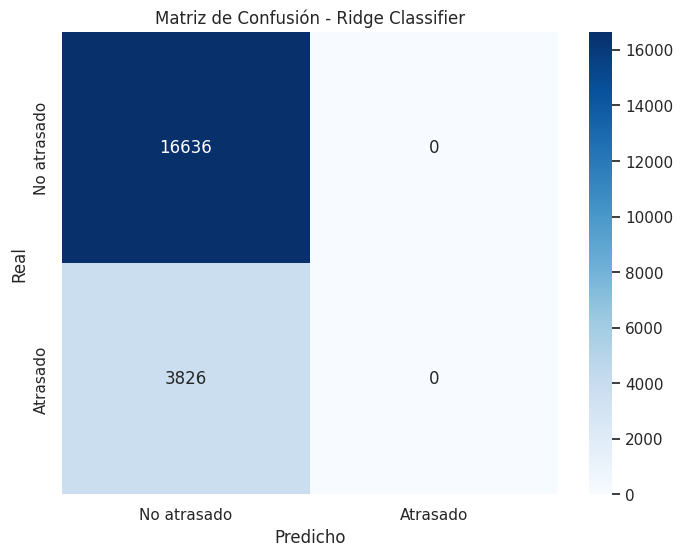

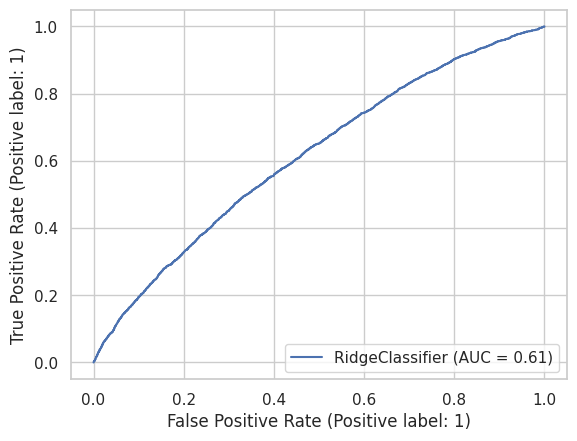

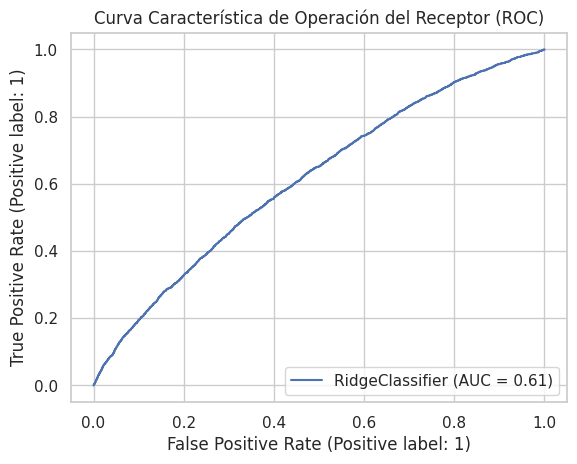

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

ruta = "/content/synthetic_features.csv"  # Ruta al archivo CSV
df = pd.read_csv(ruta,low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)

# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15','dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
#X_train[num_features] = scaler.fit_transform(X_train[num_features])
#X_test[num_features] = scaler.transform(X_test[num_features])

# Estimar hiperparámetros y entrenar Ridge Classifier
param_grid_rl = {'alpha': [0.1, 1, 10],
                 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rid_clf = RidgeClassifier()
grid_search_rl = GridSearchCV(rid_clf, param_grid_rl, scoring='accuracy',
                              return_train_score=True, verbose=True)
grid_search_rl.fit(X_train, y_train)
best_rl_clf = grid_search_rl.best_estimator_
y_pred_rl = best_rl_clf.predict(X_test)

# Informe de clasificación y resultados para Ridge Classifier
print("Informe de clasificación - Ridge Classifier:")
print(classification_report(y_test, y_pred_rl))
print("Matriz de confusión - Ridge Classifier:")
print(confusion_matrix(y_test, y_pred_rl))
print("Precisión - Ridge Classifier:", accuracy_score(y_test, y_pred_rl))
print("Mejores hiperparámetros:", grid_search_rl.best_params_)

# Mostrar la matriz de confusión con etiquetas
cm_rl = confusion_matrix(y_test, y_pred_rl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rl, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Ridge Classifier')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.yticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.show()

# Calcular y mostrar la curva ROC
roc_display = RocCurveDisplay.from_estimator(best_rl_clf, X_test, y_test)
roc_display.plot()
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Informe de clasificación - KNN:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     16636
           1       0.52      0.13      0.21      3826

    accuracy                           0.82     20462
   macro avg       0.68      0.55      0.55     20462
weighted avg       0.77      0.82      0.77     20462

Matriz de confusión - KNN:
[[16182   454]
 [ 3330   496]]
Precisión - KNN: 0.8150718404848011
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


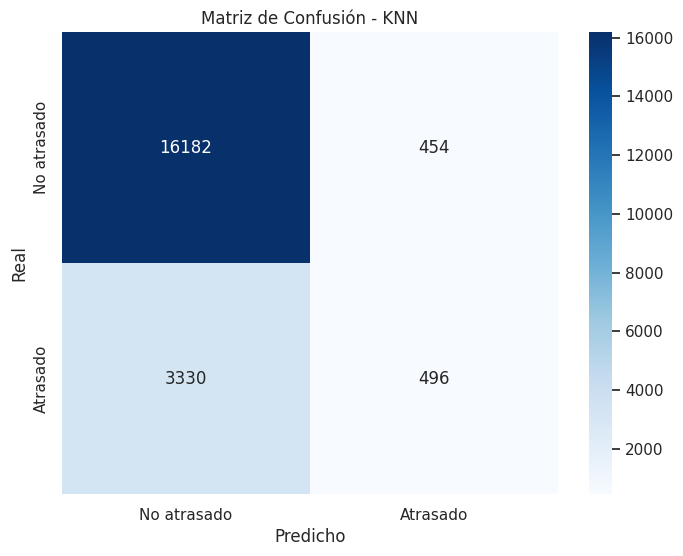

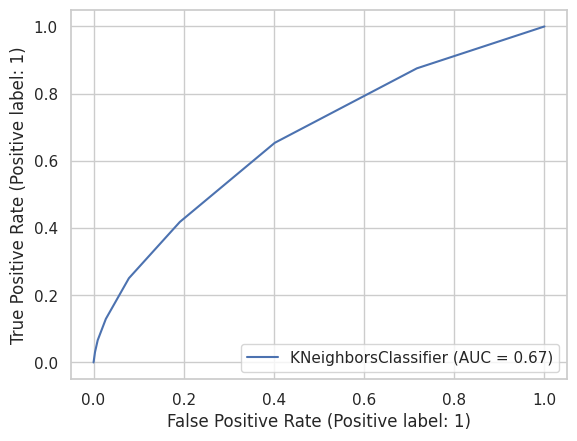

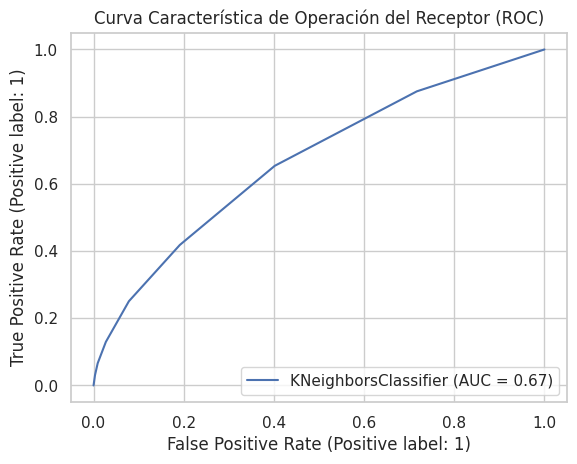

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Estimar hiperparámetros y entrenar KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}
knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, scoring='accuracy',
                               return_train_score=True, verbose=True)
grid_search_knn.fit(X_train, y_train)
best_knn_clf = grid_search_knn.best_estimator_
y_pred_knn = best_knn_clf.predict(X_test)

# Informe de clasificación y resultados para KNN
print("Informe de clasificación - KNN:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión - KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print("Precisión - KNN:", accuracy_score(y_test, y_pred_knn))
print("Mejores hiperparámetros:", grid_search_knn.best_params_)

# Mostrar la matriz de confusión con etiquetas
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.yticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.show()

# Calcular y mostrar la curva ROC
roc_display = RocCurveDisplay.from_estimator(best_knn_clf, X_test, y_test)
roc_display.plot()
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Informe de clasificación - Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     16636
           1       0.00      0.00      0.00      3826

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

Matriz de confusión - Naive Bayes:
[[16636     0]
 [ 3826     0]]
Precisión - Naive Bayes: 0.8130192552047698
Mejor hiperparámetro: {'var_smoothing': 0.5}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


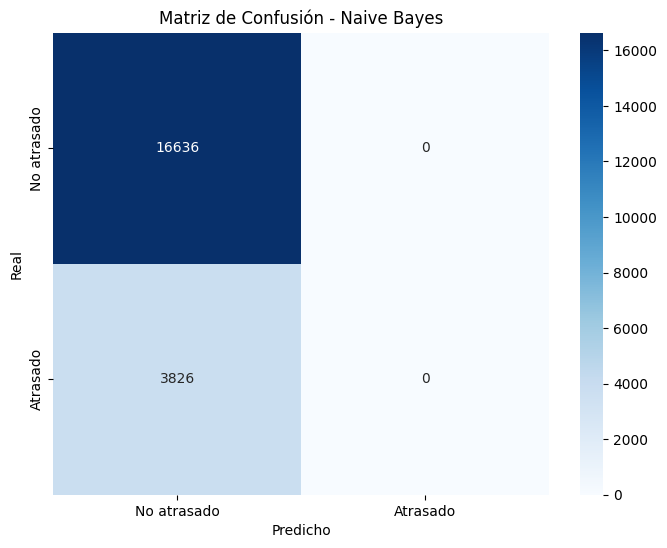

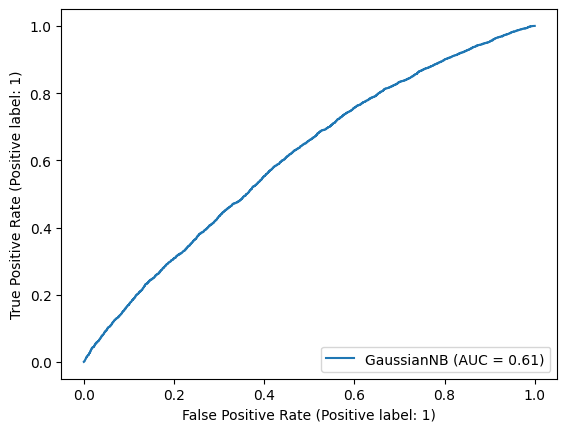

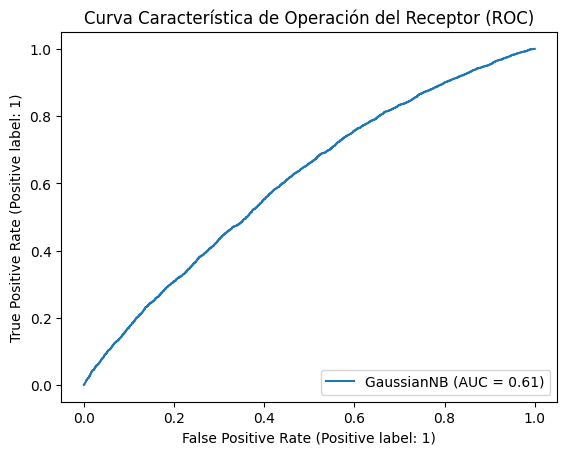

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay

ruta = "/content/synthetic_features.csv"  # Ruta al archivo CSV
df = pd.read_csv(ruta, low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)

# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15', 'dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Definir la cuadrícula de hiperparámetros para el suavizado (smoothing)
param_grid_nb = {'var_smoothing': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Estimar hiperparámetros y entrenar Naive Bayes
nb_clf = GaussianNB()
grid_search_nb = GridSearchCV(nb_clf, param_grid_nb, scoring='accuracy',
                              return_train_score=True, verbose=True)
grid_search_nb.fit(X_train, y_train)
best_nb_clf = grid_search_nb.best_estimator_
y_pred_nb = best_nb_clf.predict(X_test)

# Informe de clasificación y resultados para Naive Bayes
print("Informe de clasificación - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Matriz de confusión - Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))
print("Precisión - Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Mejor hiperparámetro:", grid_search_nb.best_params_)

# Mostrar la matriz de confusión con etiquetas
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.yticks([0.5, 1.5], ['No atrasado', 'Atrasado'])
plt.show()

# Calcular y mostrar la curva ROC
roc_display = RocCurveDisplay.from_estimator(best_nb_clf, X_test, y_test)
roc_display.plot()
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Leer el dataset original
ruta = "/content/dataset_SCL.csv"
df2 = pd.read_csv(ruta, dtype={1: "string", 6: "string"})

# Crear una columna que indique los continentes del destino
continentes = {
    'KMIA': 'América',
    'KDFW': 'América',
    'SAEZ': 'América',
    'CYYZ': 'América',
    'LFPG': 'Europa',
    'MMMX': 'América',
    'SABE': 'América',
    'SKBO': 'América',
    'LIRF': 'Europa',
    'EGLL': 'Europa',
    'MPTO': 'América',
    'KATL': 'América',
    'SBGR': 'América',
    'SBGL': 'América',
    'SBFL': 'América',
    'LEMD': 'Europa',
    'SPJC': 'América',
    'YSSY': 'Oceanía',
    'KIAH': 'América',
    'SGAS': 'América',
    'SBFI': 'América',
    'SCTE': 'América',
    'SCCI': 'América',
    'SCNT': 'América',
    'SCBA': 'América',
    'SCQP': 'América',
    'SCVD': 'América',
    'SCIE': 'América',
    'SCSE': 'América',
    'SCAT': 'América',
    'SCCF': 'América',
    'SCFA': 'América',
    'SCDA': 'América',
    'SCAR': 'América',
    'SAME': 'América',
    'SACO': 'América',
    'SUMU': 'América',
    'SCPQ': 'América',
    'SCJO': 'América',
    'KMCO': 'América',
    'KJFK': 'América',
    'SEGU': 'América',
    'MMUN': 'América',
    'MDPC': 'América',
    'KLAX': 'América',
    'NZAA': 'Oceanía',
    'SCIP': 'América',
    'SLLP': 'América',
    'SLVR': 'América',
    'SBCT': 'América',
    'SEQM': 'América',
    'SAZS': 'América',
    'SAAR': 'América',
    'KIAD': 'América',
    'SANT': 'América',
    'YMML': 'Oceanía',
    'SANU': 'América',
    'SAZN': 'América',
    'SPSO': 'América',
    'SAWH': 'América',
    'EGYP': 'Europa',
    'SULS': 'América',
    'SLCB': 'América'
}
df2['Continente'] = df2['Des-O'].map(continentes)

# Leer el dataset con las características sintéticas
ruta_sinteticas = "/content/synthetic_features.csv"
df = pd.read_csv(ruta_sinteticas, low_memory=False)
df["FECHA_I"] = pd.to_datetime(df["FECHA_I"])
df["DIA_SEMANA"] = df["FECHA_I"].dt.day_name()
df.drop(columns=['FECHA_I', 'FECHA_O'], inplace=True)
df['Continente']=df2['Continente']
# Variables numéricas y categóricas
num_features = []
cat_features = ['VLO_I', 'ORI_I', 'DES_I', 'EMP_I', 'VLO_O', 'ORI_O', 'DES_O', 'EMP_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia', 'DIA_SEMANA', 'Continente']

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
for feature in cat_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separar las variables de entrada (features) y la variable objetivo (target)
X = df.drop(columns=['atraso_15','dif_min'])
y = df['atraso_15']

# Separar los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
#X_train[num_features] = scaler.fit_transform(X_train[num_features])
#X_test[num_features] = scaler.transform(X_test[num_features])

# Verificar los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train): (47744, 20)
Dimensiones del conjunto de prueba (X_test): (20462, 20)
Dimensiones del conjunto de entrenamiento (y_train): (47744,)
Dimensiones del conjunto de prueba (y_test): (20462,)
